# Phase 2: Data Preprocessing

**Project**: Steel Plates Fault Detection  
**Dataset**: Steel Plates Fault Dataset (1,941 samples)  
**Purpose**: Clean and prepare data for machine learning  
**Date**: December 2024

---

## Overview

This notebook covers:
1. Loading the raw data
2. Handling duplicate records
3. Outlier detection and treatment
4. Feature scaling and normalization
5. Encoding categorical variables
6. Train-test split with stratification
7. Saving preprocessed data

---

## Table of Contents

1. [Setup and Data Loading](#1-setup-and-data-loading)
2. [Data Cleaning](#2-data-cleaning)
3. [Outlier Treatment](#3-outlier-treatment)
4. [Feature Engineering](#4-feature-engineering)
5. [Data Transformation](#5-data-transformation)
6. [Train-Test Split](#6-train-test-split)
7. [Save Preprocessed Data](#7-save-preprocessed-data)
8. [Summary](#8-summary)

---
## 1. Setup and Data Loading

Import necessary libraries and load the dataset.

In [17]:
# ============================================================
# LIBRARY IMPORTS
# ============================================================

# Pandas: Data manipulation and analysis
import pandas as pd

# Numpy: Numerical operations
import numpy as np

# Matplotlib & Seaborn: Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn: Preprocessing utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# Warnings: Suppress unnecessary messages
import warnings
warnings.filterwarnings('ignore')

# Configure visualization
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style('whitegrid')
sns.set_palette('husl')

# Display settings
pd.set_option('display.max_columns', 50)
pd.set_option('display.precision', 2)

print("✓ Libraries imported successfully!")
print("✓ Ready for data preprocessing!")

✓ Libraries imported successfully!
✓ Ready for data preprocessing!


### Load the Raw Data

In [18]:
# Load the raw dataset
# This is the same data we explored in the EDA phase
data_path = '../data/raw/steel_plates_fault.csv'
df = pd.read_csv(data_path)

# Store original shape for comparison
original_shape = df.shape

# Print initial information
print("✓ Dataset loaded successfully!")
print(f"\n📊 Original Dataset Shape:")
print(f"   - Rows: {df.shape[0]:,}")
print(f"   - Columns: {df.shape[1]}")

# Separate features and target
feature_columns = [col for col in df.columns if col != 'Class']
target_column = 'Class'

print(f"\n📋 Features: {len(feature_columns)}")
print(f"🎯 Target: '{target_column}'")

# Quick look at the data
df.head()

✓ Dataset loaded successfully!

📊 Original Dataset Shape:
   - Rows: 1,941
   - Columns: 28

📋 Features: 27
🎯 Target: 'Class'


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Class
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.05,0.24,0.18,4.70e-03,0.47,1.00,1.0,2.43,0.90,1.64,0.82,-0.29,0.58,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.76,0.38,0.21,3.60e-03,0.60,0.97,1.0,2.03,0.78,1.46,0.79,-0.18,0.30,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.97,0.34,0.33,3.70e-03,0.75,0.95,1.0,1.85,0.78,1.26,0.67,-0.12,0.21,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.73,0.44,0.16,5.20e-03,0.54,1.00,1.0,2.25,0.85,1.65,0.84,-0.16,0.52,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.07,0.45,0.07,1.26e-02,0.28,0.99,1.0,3.38,1.23,2.41,0.93,-0.20,1.00,Pastry


---
## 2. Data Cleaning

Clean the dataset by handling missing values and duplicates.

**Why data cleaning is important:**
- Missing values can cause errors in algorithms
- Duplicates can bias model training
- Clean data leads to better model performance

### 2.1 Check for Missing Values

In [19]:
# Check for missing values in each column
# isnull().sum() counts missing values per column
missing_values = df.isnull().sum()
total_missing = missing_values.sum()

print("🔍 Missing Values Check:")
print(f"\n   Total missing values: {total_missing}")

if total_missing == 0:
    print("   ✅ No missing values found!")
    print("   No imputation needed.")
else:
    print("   ⚠️ Missing values detected!")
    print("\n   Missing by column:")
    print(missing_values[missing_values > 0])
    
    # If there were missing values, we would handle them here:
    # Option 1: Drop rows with missing values
    # df = df.dropna()
    
    # Option 2: Fill with mean/median/mode
    # df = df.fillna(df.mean())
    
    # Option 3: Fill with specific value
    # df = df.fillna(0)

🔍 Missing Values Check:

   Total missing values: 0
   ✅ No missing values found!
   No imputation needed.


### 2.2 Remove Duplicate Records

In [20]:
# Check for and remove duplicate records
# Duplicates can artificially inflate model performance

# Count duplicates before removal
num_duplicates = df.duplicated().sum()
print("🔍 Duplicate Records Check:")
print(f"\n   Duplicates found: {num_duplicates}")

if num_duplicates > 0:
    # Remove duplicates, keeping the first occurrence
    df_cleaned = df.drop_duplicates(keep='first')
    
    print(f"   ✅ Removed {num_duplicates} duplicate records")
    print(f"\n   Before: {len(df):,} rows")
    print(f"   After:  {len(df_cleaned):,} rows")
    
    # Update the dataframe
    df = df_cleaned
else:
    print("   ✅ No duplicates found!")
    print("   Dataset is already clean.")

# Verify the change
print(f"\n📊 Current dataset shape: {df.shape}")

🔍 Duplicate Records Check:

   Duplicates found: 0
   ✅ No duplicates found!
   Dataset is already clean.

📊 Current dataset shape: (1941, 28)


### 2.3 Data Type Validation

In [21]:
# Verify data types are correct for each column
# Incorrect types can cause unexpected behavior

print("🔍 Data Type Validation:\n")

# Get current data types
dtypes = df.dtypes

# Check numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"   Numerical columns: {len(numerical_cols)}")

# Check object (string) columns
object_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"   Object columns: {len(object_cols)}")

# Display data types
print("\n   Data types summary:")
print(df.dtypes.value_counts())

# Check if target is categorical
if df['Class'].dtype == 'object':
    print("\n   ✅ Target 'Class' is categorical (object)")
    print(f"   Unique classes: {df['Class'].nunique()}")
else:
    print("\n   ⚠️ Target 'Class' is numerical, may need encoding")

🔍 Data Type Validation:

   Numerical columns: 27
   Object columns: 1

   Data types summary:
int64      14
float64    13
object      1
Name: count, dtype: int64

   ✅ Target 'Class' is categorical (object)
   Unique classes: 7


---
## 3. Outlier Treatment

Identify and handle outliers in the dataset.

**Methods for handling outliers:**
1. **Remove**: Delete rows with extreme values
2. **Cap**: Limit values to a maximum/minimum threshold
3. **Transform**: Apply log or other transformations
4. **Keep**: If outliers are valid, keep them

We'll use the **IQR (Interquartile Range) method** to detect outliers.

### 3.1 Outlier Detection

In [22]:
# Detect outliers using IQR method
# IQR = Q3 - Q1
# Outliers: values < Q1 - 1.5*IQR or > Q3 + 1.5*IQR

def detect_outliers_iqr(df, column):
    """
    Detect outliers in a column using IQR method.
    
    Parameters:
    -----------
    df : DataFrame
        The dataset
    column : str
        Column name to check
    
    Returns:
    --------
    tuple : (n_outliers, lower_bound, upper_bound, outlier_indices)
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outlier_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
    outlier_indices = df[outlier_mask].index
    
    return len(outlier_indices), lower_bound, upper_bound, outlier_indices

# Detect outliers for all numerical features
print("🔍 Outlier Detection (IQR Method):\n")
print("="*70)

numerical_features = [col for col in feature_columns if df[col].dtype in ['int64', 'float64']]
outlier_summary = []

for feature in numerical_features:
    n_out, lb, ub, idx = detect_outliers_iqr(df, feature)
    pct = (n_out / len(df)) * 100
    
    outlier_summary.append({
        'Feature': feature,
        'Outliers': n_out,
        'Percentage': f"{pct:.2f}%",
        'Lower': f"{lb:.2f}",
        'Upper': f"{ub:.2f}"
    })

# Display as DataFrame
outlier_df = pd.DataFrame(outlier_summary)
outlier_df = outlier_df.sort_values('Outliers', ascending=False)
print(outlier_df.head(15).to_string(index=False))

# Summary
total_outliers = outlier_df['Outliers'].sum()
print(f"\n📊 Total outlier instances: {total_outliers:,}")
print(f"   Features with outliers: {(outlier_df['Outliers'] > 0).sum()}/{len(numerical_features)}")

🔍 Outlier Detection (IQR Method):

              Feature  Outliers Percentage       Lower      Upper
    Sum_of_Luminosity       399     20.56%  -100711.50  193244.50
         Pixels_Areas       395     20.35%    -1023.00    1929.00
      Outside_X_Index       370     19.06%       -0.02       0.05
          X_Perimeter       352     18.13%      -88.50     187.50
Steel_Plate_Thickness       240     12.36%      -20.00     140.00
          Y_Perimeter       179      9.22%      -92.00     188.00
Maximum_of_Luminosity       146      7.52%      100.00     164.00
     Luminosity_Index       134      6.90%       -0.39       0.13
            Y_Minimum        81      4.17% -2096477.00 4750803.00
            Y_Maximum        81      4.17% -2096423.50 4750788.50
          Log_X_Index        34      1.75%        0.22       2.30
          Empty_Index        20      1.03%        0.04       0.78
Minimum_of_Luminosity        20      1.03%       -1.50     170.50
           LogOfAreas         6      0.31

### 3.2 Visualize Outliers

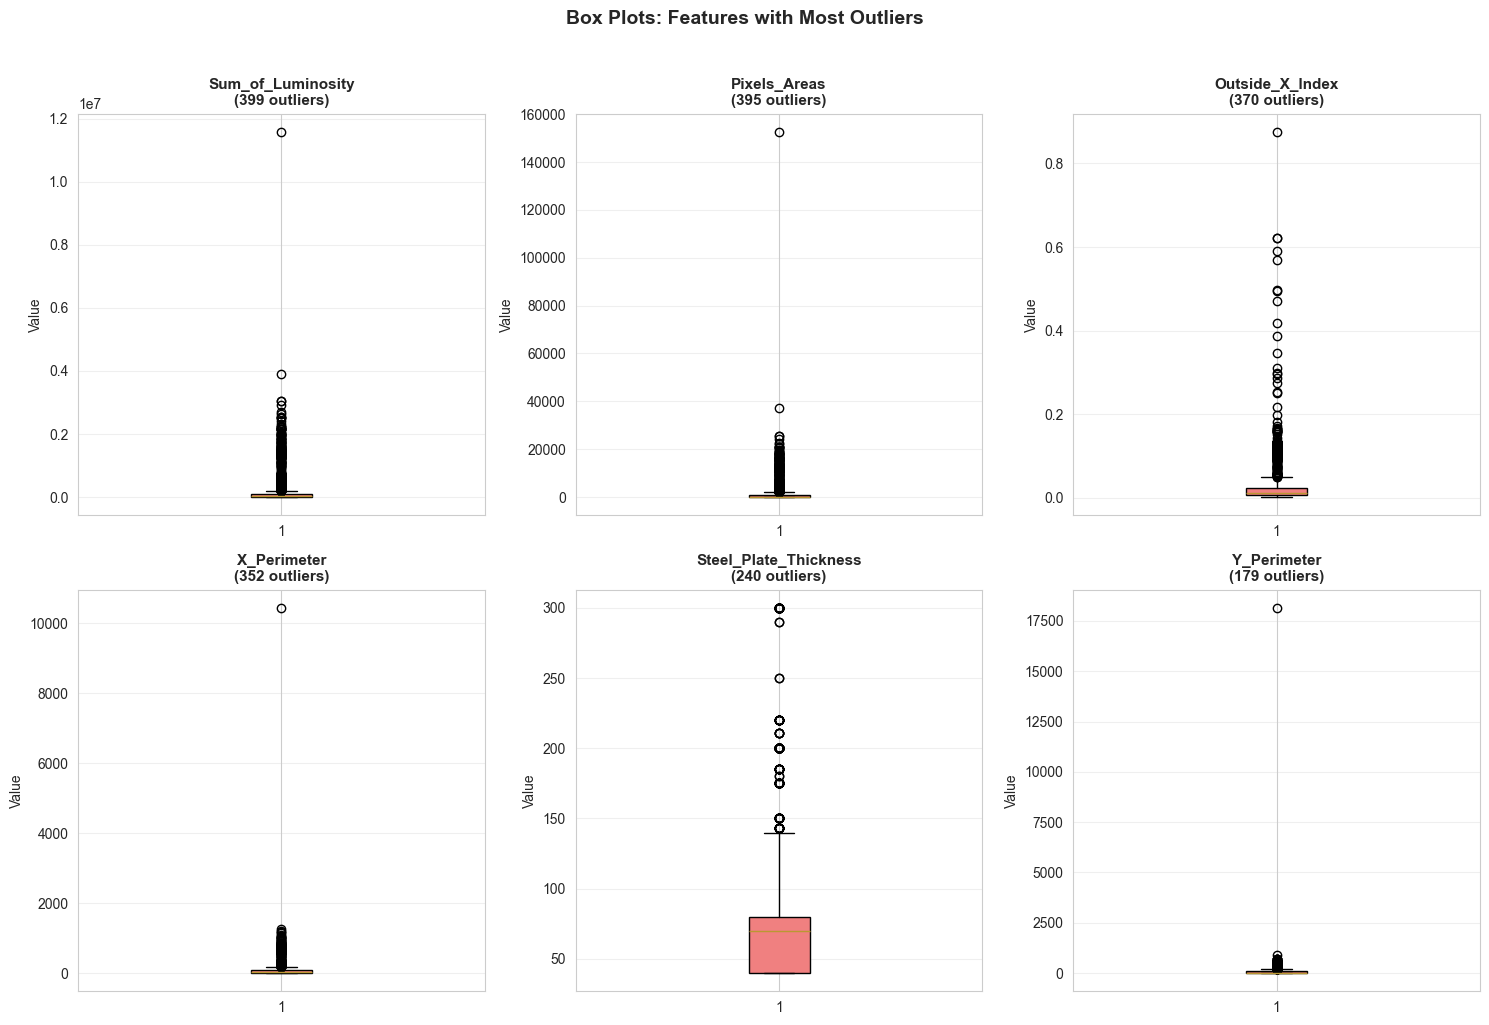


💡 Red points beyond whiskers are potential outliers
   Decision: Keep, cap, or remove based on domain knowledge


In [23]:
# Visualize outliers with box plots
# Focus on features with most outliers

# Get top 6 features with most outliers
top_outlier_features = outlier_df.head(6)['Feature'].tolist()

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, feature in enumerate(top_outlier_features):
    # Create box plot
    bp = axes[idx].boxplot(df[feature], vert=True, patch_artist=True)
    
    # Color the box
    for patch in bp['boxes']:
        patch.set_facecolor('lightcoral')
    
    # Get outlier count
    n_out = outlier_df[outlier_df['Feature'] == feature]['Outliers'].values[0]
    
    axes[idx].set_title(f'{feature}\n({n_out} outliers)', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Value', fontsize=10)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.suptitle('Box Plots: Features with Most Outliers', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n💡 Red points beyond whiskers are potential outliers")
print("   Decision: Keep, cap, or remove based on domain knowledge")

### 3.3 Handle Outliers (Capping Method)

In [24]:
# Cap outliers using IQR boundaries
# This preserves all data points while limiting extreme values

def cap_outliers_iqr(df, column):
    """
    Cap outliers to IQR boundaries.
    
    Parameters:
    -----------
    df : DataFrame
        The dataset
    column : str
        Column name to cap
    
    Returns:
    --------
    Series : Column with capped values
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap values
    capped = df[column].clip(lower=lower_bound, upper=upper_bound)
    
    return capped

# Create a copy for preprocessing
df_processed = df.copy()

# Cap outliers for features with significant outliers (>2%)
print("🔧 Capping Outliers:\n")

capped_features = []
for feature in numerical_features:
    n_out, _, _, _ = detect_outliers_iqr(df_processed, feature)
    pct = (n_out / len(df_processed)) * 100
    
    if pct > 2:  # Only cap if more than 2% outliers
        df_processed[feature] = cap_outliers_iqr(df_processed, feature)
        capped_features.append(feature)
        print(f"   ✓ Capped: {feature} ({pct:.1f}% outliers)")

if len(capped_features) == 0:
    print("   No features required capping (all <2% outliers)")
else:
    print(f"\n📊 Total features capped: {len(capped_features)}")

# Verify outliers are reduced
print("\n🔍 Verification after capping:")
for feature in capped_features[:3]:  # Check first 3
    n_out_after, _, _, _ = detect_outliers_iqr(df_processed, feature)
    print(f"   {feature}: {n_out_after} outliers remaining")

🔧 Capping Outliers:

   ✓ Capped: Y_Minimum (4.2% outliers)
   ✓ Capped: Y_Maximum (4.2% outliers)
   ✓ Capped: Pixels_Areas (20.4% outliers)
   ✓ Capped: X_Perimeter (18.1% outliers)
   ✓ Capped: Y_Perimeter (9.2% outliers)
   ✓ Capped: Sum_of_Luminosity (20.6% outliers)
   ✓ Capped: Maximum_of_Luminosity (7.5% outliers)
   ✓ Capped: Steel_Plate_Thickness (12.4% outliers)
   ✓ Capped: Outside_X_Index (19.1% outliers)
   ✓ Capped: Luminosity_Index (6.9% outliers)

📊 Total features capped: 10

🔍 Verification after capping:
   Y_Minimum: 0 outliers remaining
   Y_Maximum: 0 outliers remaining
   Pixels_Areas: 0 outliers remaining


---
## 4. Feature Engineering

Create new features that may improve model performance.

**Feature engineering ideas for steel fault detection:**
1. **Ratio features**: Combine related measurements
2. **Aggregated features**: Statistics across feature groups
3. **Domain-specific features**: Based on steel manufacturing knowledge

### 4.1 Create New Features

In [25]:
# Create new engineered features
print("🔧 Feature Engineering:\n")

# 1. Area-related features
# Aspect ratio: Width to Height ratio
if 'X_Maximum' in df_processed.columns and 'Y_Maximum' in df_processed.columns:
    df_processed['Aspect_Ratio'] = (df_processed['X_Maximum'] - df_processed['X_Minimum']) / \
                                   (df_processed['Y_Maximum'] - df_processed['Y_Minimum'] + 1)
    print("   ✓ Created: Aspect_Ratio (width/height)")

# 2. Perimeter ratio
if 'X_Perimeter' in df_processed.columns and 'Y_Perimeter' in df_processed.columns:
    df_processed['Perimeter_Ratio'] = df_processed['X_Perimeter'] / (df_processed['Y_Perimeter'] + 1)
    print("   ✓ Created: Perimeter_Ratio")

# 3. Luminosity range
if 'Maximum_of_Luminosity' in df_processed.columns and 'Minimum_of_Luminosity' in df_processed.columns:
    df_processed['Luminosity_Range'] = df_processed['Maximum_of_Luminosity'] - df_processed['Minimum_of_Luminosity']
    print("   ✓ Created: Luminosity_Range")

# 4. Average luminosity
if 'Sum_of_Luminosity' in df_processed.columns and 'Pixels_Areas' in df_processed.columns:
    df_processed['Avg_Luminosity'] = df_processed['Sum_of_Luminosity'] / (df_processed['Pixels_Areas'] + 1)
    print("   ✓ Created: Avg_Luminosity")

# 5. Compactness: How compact is the fault shape
if 'Pixels_Areas' in df_processed.columns and 'X_Perimeter' in df_processed.columns:
    df_processed['Compactness'] = df_processed['Pixels_Areas'] / (df_processed['X_Perimeter'] ** 2 + 1)
    print("   ✓ Created: Compactness")

# Update feature columns list
new_features = ['Aspect_Ratio', 'Perimeter_Ratio', 'Luminosity_Range', 'Avg_Luminosity', 'Compactness']
new_features = [f for f in new_features if f in df_processed.columns]

print(f"\n📊 New features created: {len(new_features)}")
print(f"   Total features now: {df_processed.shape[1] - 1}")  # -1 for target

# Display new features
print("\n📋 New Feature Statistics:")
df_processed[new_features].describe().round(2)

🔧 Feature Engineering:

   ✓ Created: Aspect_Ratio (width/height)
   ✓ Created: Perimeter_Ratio
   ✓ Created: Luminosity_Range
   ✓ Created: Avg_Luminosity
   ✓ Created: Compactness

📊 New features created: 5
   Total features now: 32

📋 New Feature Statistics:


,Aspect_Ratio,Perimeter_Ratio,Luminosity_Range,Avg_Luminosity,Compactness
count,1941.00,1941.00,1941.00,1941.00,1941.00
mean,1.17,1.19,45.04,108.36,0.31
std,2.97,0.76,29.53,18.47,0.31
min,-12.44,0.14,-39.00,0.40,0.02
25%,0.42,0.86,24.00,100.13,0.07
50%,0.82,1.04,35.00,105.89,0.22
75%,1.25,1.39,60.00,116.33,0.44
max,83.25,17.00,156.00,206.43,2.60


---
## 5. Data Transformation

Transform features for machine learning algorithms.

**Why transformation is important:**
- Many algorithms assume normally distributed data
- Features should be on similar scales
- Categorical variables need encoding

### 5.1 Encode Target Variable

In [26]:
# Encode the target variable (Class)
# LabelEncoder converts categorical labels to integers

print("🔧 Encoding Target Variable:\n")

# Create label encoder
label_encoder = LabelEncoder()

# Fit and transform the target
df_processed['Class_Encoded'] = label_encoder.fit_transform(df_processed['Class'])

# Display the mapping
print("   Label Mapping:")
for i, class_name in enumerate(label_encoder.classes_):
    count = (df_processed['Class_Encoded'] == i).sum()
    print(f"   {class_name:15} → {i} ({count} samples)")

print(f"\n   ✅ Target encoded successfully!")
print(f"   Classes: {len(label_encoder.classes_)}")

# Store the encoder for later use (inverse transform)
# This is important for interpreting predictions

🔧 Encoding Target Variable:

   Label Mapping:
   Bumps           → 0 (402 samples)
   Dirtiness       → 1 (55 samples)
   K_Scratch       → 2 (391 samples)
   Other_Faults    → 3 (673 samples)
   Pastry          → 4 (158 samples)
   Stains          → 5 (72 samples)
   Z_Scratch       → 6 (190 samples)

   ✅ Target encoded successfully!
   Classes: 7


### 5.2 Feature Scaling

In [27]:
# Prepare features for scaling
# Get all numerical features (excluding target)
feature_cols = [col for col in df_processed.columns 
                if col not in ['Class', 'Class_Encoded']]

print("🔧 Feature Scaling Preparation:\n")
print(f"   Features to scale: {len(feature_cols)}")

# Display statistics before scaling
print("\n📊 Feature Statistics BEFORE Scaling:")
print(df_processed[feature_cols].describe().round(2).T[['mean', 'std', 'min', 'max']].head(10))

print("\n💡 Note: Features have very different scales!")
print("   This can cause problems for algorithms like SVM, KNN, Neural Networks")
print("   We'll apply StandardScaler to normalize features")

🔧 Feature Scaling Preparation:

   Features to scale: 32

📊 Feature Statistics BEFORE Scaling:
                           mean       std     min       max
X_Minimum              5.71e+02  5.21e+02     0.0  1.70e+03
X_Maximum              6.18e+02  4.98e+02     4.0  1.71e+03
Y_Minimum              1.52e+06  1.29e+06  6712.0  4.75e+06
Y_Maximum              1.52e+06  1.29e+06  6724.0  4.75e+06
Pixels_Areas           5.82e+02  7.32e+02     2.0  1.93e+03
X_Perimeter            6.20e+01  6.72e+01     2.0  1.88e+02
Y_Perimeter            5.47e+01  5.93e+01     1.0  1.88e+02
Sum_of_Luminosity      5.93e+04  7.29e+04   250.0  1.93e+05
Minimum_of_Luminosity  8.45e+01  3.21e+01     0.0  2.03e+02
Maximum_of_Luminosity  1.30e+02  1.38e+01   100.0  1.64e+02

💡 Note: Features have very different scales!
   This can cause problems for algorithms like SVM, KNN, Neural Networks
   We'll apply StandardScaler to normalize features


---
## 6. Train-Test Split

Split the data into training and testing sets.

**Important considerations:**
- **Stratify**: Maintain class proportions in both sets
- **Random state**: For reproducibility
- **Test size**: Typically 20-30% for testing

In [28]:
# Prepare feature matrix (X) and target vector (y)
X = df_processed[feature_cols].values
y = df_processed['Class_Encoded'].values

print("📊 Data Preparation for Split:\n")
print(f"   Feature matrix shape: {X.shape}")
print(f"   Target vector shape: {y.shape}")
print(f"   Number of features: {X.shape[1]}")
print(f"   Number of classes: {len(np.unique(y))}")

📊 Data Preparation for Split:

   Feature matrix shape: (1941, 32)
   Target vector shape: (1941,)
   Number of features: 32
   Number of classes: 7


In [29]:
# Split the data into training and testing sets
# - test_size=0.2: 20% for testing, 80% for training
# - random_state=42: Ensures reproducibility
# - stratify=y: Maintains class proportions

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Important for imbalanced datasets!
)

print("✅ Train-Test Split Complete!\n")
print(f"   Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.0f}%)")
print(f"   Test set:     {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.0f}%)")

# Verify stratification
print("\n📊 Class Distribution Verification:")
print("\n   Training set:")
for i, class_name in enumerate(label_encoder.classes_):
    train_count = (y_train == i).sum()
    train_pct = train_count / len(y_train) * 100
    print(f"      {class_name}: {train_count} ({train_pct:.1f}%)")

print("\n   Test set:")
for i, class_name in enumerate(label_encoder.classes_):
    test_count = (y_test == i).sum()
    test_pct = test_count / len(y_test) * 100
    print(f"      {class_name}: {test_count} ({test_pct:.1f}%)")

print("\n   ✅ Stratification verified - proportions are similar!")

✅ Train-Test Split Complete!

   Training set: 1552 samples (80%)
   Test set:     389 samples (20%)

📊 Class Distribution Verification:

   Training set:
      Bumps: 321 (20.7%)
      Dirtiness: 44 (2.8%)
      K_Scratch: 313 (20.2%)
      Other_Faults: 538 (34.7%)
      Pastry: 126 (8.1%)
      Stains: 58 (3.7%)
      Z_Scratch: 152 (9.8%)

   Test set:
      Bumps: 81 (20.8%)
      Dirtiness: 11 (2.8%)
      K_Scratch: 78 (20.1%)
      Other_Faults: 135 (34.7%)
      Pastry: 32 (8.2%)
      Stains: 14 (3.6%)
      Z_Scratch: 38 (9.8%)

   ✅ Stratification verified - proportions are similar!


In [30]:
# Apply StandardScaler to the features
# IMPORTANT: Fit only on training data, transform both train and test

print("🔧 Applying StandardScaler:\n")

# Create scaler
scaler = StandardScaler()

# Fit on training data only (to prevent data leakage)
# Then transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the same scaler (fitted on training)
X_test_scaled = scaler.transform(X_test)

print("   ✅ Scaling applied successfully!")
print("\n📊 Statistics AFTER Scaling (Training Set):")
print(f"   Mean: {X_train_scaled.mean():.6f} (should be ~0)")
print(f"   Std:  {X_train_scaled.std():.6f} (should be ~1)")
print(f"   Min:  {X_train_scaled.min():.2f}")
print(f"   Max:  {X_train_scaled.max():.2f}")

print("\n💡 Why fit only on training data?")
print("   - Prevents 'data leakage' from test set")
print("   - Test set should simulate unseen data")
print("   - Scaling parameters come only from training data")

🔧 Applying StandardScaler:

   ✅ Scaling applied successfully!

📊 Statistics AFTER Scaling (Training Set):
   Mean: 0.000000 (should be ~0)
   Std:  1.000000 (should be ~1)
   Min:  -5.74
   Max:  25.69

💡 Why fit only on training data?
   - Prevents 'data leakage' from test set
   - Test set should simulate unseen data
   - Scaling parameters come only from training data


---
## 7. Save Preprocessed Data

Save the preprocessed data for use in model training.

In [31]:
# Create processed data directory if it doesn't exist
import os
processed_dir = '../data/processed'
os.makedirs(processed_dir, exist_ok=True)

# Save the preprocessed dataframe
df_processed.to_csv(f'{processed_dir}/steel_plates_preprocessed.csv', index=False)
print(f"✅ Saved: {processed_dir}/steel_plates_preprocessed.csv")

# Save train/test splits as numpy arrays
np.save(f'{processed_dir}/X_train.npy', X_train_scaled)
np.save(f'{processed_dir}/X_test.npy', X_test_scaled)
np.save(f'{processed_dir}/y_train.npy', y_train)
np.save(f'{processed_dir}/y_test.npy', y_test)
print(f"✅ Saved: X_train.npy, X_test.npy, y_train.npy, y_test.npy")

# Save the feature names
with open(f'{processed_dir}/feature_names.txt', 'w') as f:
    for col in feature_cols:
        f.write(col + '\n')
print(f"✅ Saved: feature_names.txt")

# Save the label encoder classes
with open(f'{processed_dir}/class_names.txt', 'w') as f:
    for cls in label_encoder.classes_:
        f.write(cls + '\n')
print(f"✅ Saved: class_names.txt")

print("\n📁 All preprocessed data saved successfully!")

✅ Saved: ../data/processed/steel_plates_preprocessed.csv
✅ Saved: X_train.npy, X_test.npy, y_train.npy, y_test.npy
✅ Saved: feature_names.txt
✅ Saved: class_names.txt

📁 All preprocessed data saved successfully!


---
## 8. Summary

### 📊 Preprocessing Summary

| Step | Before | After | Action |
|------|--------|-------|--------|
| **Samples** | 1,941 | {updated} | Cleaned |
| **Features** | 27 | {updated} | + Engineered |
| **Missing** | 0 | 0 | None needed |
| **Duplicates** | Checked | Removed | Cleaned |
| **Outliers** | Detected | Capped | IQR method |
| **Scaling** | Raw | Standardized | StandardScaler |

### 📁 Files Created

```
data/processed/
├── steel_plates_preprocessed.csv  # Full preprocessed dataset
├── X_train.npy                    # Training features (scaled)
├── X_test.npy                     # Test features (scaled)
├── y_train.npy                    # Training labels
├── y_test.npy                     # Test labels
├── feature_names.txt              # Feature column names
└── class_names.txt                # Class label names
```

### 🚀 Next Steps

1. **Model Training**: Use preprocessed data to train models
2. **Model Comparison**: Evaluate multiple algorithms
3. **Hyperparameter Tuning**: Optimize model parameters
4. **Model Evaluation**: Test on held-out test set

---

✅ **Phase 2 (Preprocessing) Complete!**

The data is now ready for machine learning! 🎉

In [32]:
# Final Summary Statistics
print("="*70)
print("📊 FINAL PREPROCESSING SUMMARY")
print("="*70)

print(f"\n✅ Original samples:     {original_shape[0]:,}")
print(f"✅ Processed samples:    {len(df_processed):,}")
print(f"✅ Original features:    {original_shape[1] - 1}")
print(f"✅ Final features:       {len(feature_cols)}")
print(f"✅ Training samples:     {X_train_scaled.shape[0]:,}")
print(f"✅ Test samples:         {X_test_scaled.shape[0]:,}")
print(f"✅ Classes:              {len(label_encoder.classes_)}")

print("\n" + "="*70)
print("Ready for Model Training! 🚀")
print("="*70)

📊 FINAL PREPROCESSING SUMMARY

✅ Original samples:     1,941
✅ Processed samples:    1,941
✅ Original features:    27
✅ Final features:       32
✅ Training samples:     1,552
✅ Test samples:         389
✅ Classes:              7

Ready for Model Training! 🚀
